## **IMPORT PACKAGES**

In [59]:
import csv
import math
import random
import numpy as np
from pandas import *
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay

## **OBTAIN COLUMN NAMES FROM FILE**

In [8]:
file = input("What is the file?: ")

What is the factor?: breast-cancer-wisconsin.data.csv


In [9]:
with open(file) as inFile:
  reader = csv.reader(inFile, delimiter = ',')
  for row in reader:
    factors = row
    break
print(factors)

['id', 'clump-thickness', 'uniformity-of-cell-size', 'uniformity-of-cell-shape', 'marginal-adhesion', 'single-epithelial-cell-size', 'bare-nuclei', 'bland-chromatin', 'normal-nucleoli', 'mitoses', 'class']


## **GET FACTORS THAT SHOULD BE COMPARED**

In [10]:
factor = input("What is factor should be compared?: ")

What is factor should be compared?: marginal-adhesion


## **GET OUTLIERS**

In [11]:
data = read_csv(file)
statistics = data.describe()[factor]
IQR = statistics[6] - statistics[4]
lowerRange = statistics[4] - (1.5 * IQR)
upperRange = statistics[6] + (1.5 * IQR)
outliers = []
[outliers.append(x) for x in statistics if x <= lowerRange or x >= upperRange]
numOutliers = len(outliers)
print(numOutliers)

2


## **OBTAIN CLUSTERS**



In [24]:
numSamples = len(data)
range = np.random.RandomState(0)
covariance = np.array([[0.4, -0.5], [2.3, 0.9]])

In [27]:
cluster_1 = 0.4 * range.randn(numSamples, 2) @ covariance + np.array([2, 2])
cluster_2 = 0.3 * range.randn(numSamples, 2) + np.array([-2, -2])
outlier = range.uniform(low=-10, high=10, size=(numOutliers, 2))

## **CLUSTER ANALYSIS**

In [31]:
array1 = np.concatenate([cluster_1, cluster_2, outlier])
array2 = np.concatenate([np.ones((2 * numSamples), dtype=int), -np.ones((numOutliers), dtype=int)])

In [32]:
trainX, testX, trainY, testY = train_test_split(array1, array2, stratify=array2, random_state=33)

## **VISUALIZE THE CLUSTERS**

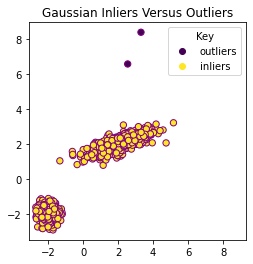

In [52]:
scatterplot = plt.scatter(array1[:, 0], array1[:, 1], c=array2, s=40, edgecolor="purple")
han, labels = scatterplot.legend_elements()
plt.axis("square")
plt.legend(handles=han, labels=["outliers", "inliers"], title="Key")
plt.title("Gaussian Inliers Versus Outliers")
plt.show()

## **TRAINING THE MODEL**

In [57]:
max_samples = input("What are the maximum number of samples being tested?: ")

What are the maximum number of samples being tested?: 100


In [58]:
model = IsolationForest(max_samples=100, random_state=0)
model.fit(trainX)

IsolationForest(max_samples=100, random_state=0)

## **PLOT DISCRETE DECISION BOUNDARY**

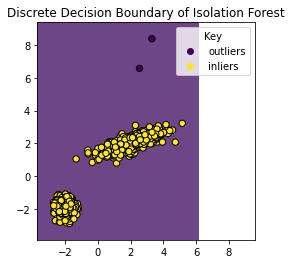

In [67]:
DDB = DecisionBoundaryDisplay.from_estimator(
    model,
    array1,
    response_method="predict",
    alpha=0.8,
)
DDB.ax_.scatter(array1[:, 0], array1[:, 1], c=array2, s=40, edgecolor="k")
DDB.ax_.set_title("Discrete Decision Boundary of Isolation Forest")
plt.axis("square")
plt.legend(handles=han, labels=["outliers", "inliers"], title="Key")
plt.show()

## **PLOT PATH LENGTH DECISION BOUNDARY**

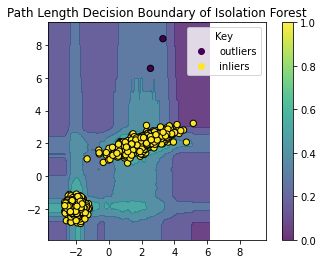

In [71]:
DDB = DecisionBoundaryDisplay.from_estimator(
    model,
    array1,
    response_method="decision_function",
    alpha=0.8,
)
DDB.ax_.scatter(array1[:, 0], array1[:, 1], c=array2, s=40, edgecolor="k")
DDB.ax_.set_title("Path Length Decision Boundary of Isolation Forest")
plt.axis("square")
plt.legend(handles=han, labels=["outliers", "inliers"], title="Key")
plt.colorbar(DDB.ax_.collections[1])
plt.show()

## **SOURCES**

https://scikit-learn.org/stable/auto_examples/ensemble/plot_isolation_forest.html#sphx-glr-auto-examples-ensemble-plot-isolation-forest-py